In [1]:
from datasets import get_batchloader
from pathlib import Path
import yaml

import inspect


### Metadata sheet
A "metadata_sheet.yaml" should be included in each unique batch upload directory. It should atleast include:

```YAML
upload_dir: location/of/batch/images
site_id: TX # TX, NC, MD
upload_datetime: 2022-05-12_13-05-22  #yyyy-mm-dd_hh-mm-ss
```

### Load Batch info 
Construct `BatchMetadata` from "metadata_sheet.yaml". BatchMetadata includes:
1.  that should accompany each batch image upload. 

***TODO***: Create preprocessing step to automatically insert information in metadata sheet upon batch upload. Add information like:
1. `upload_datetime`
2. `batch_id`

In [2]:
metadata_sheet = "data/semif-trial/metadata_sheet.yaml"
meta = yaml.load(open(metadata_sheet, "rb"), Loader=get_batchloader())

### BatchMetadata
Dataclass constructed from metadata sheet

In [3]:
# View BatchMetadata class attributes
bmeta = meta["batchmeta"][0]
inspect.getmembers(bmeta, lambda a:not(inspect.isroutine(a)))[0][1]

{'upload_dir': str,
 'site_id': str,
 'upload_datetime': str,
 'batch_id': str,
 'environmental_metadata': datasets.EnvironmentalMetadata,
 'image_list': typing.List,
 'schema_version': str}

In [4]:
# Sample of attributes
print(f"image_list: \n{bmeta.image_list[0:3]}\n")
print(f"hardiness_zone: \n{bmeta.environmental_metadata.hardiness_zone}")

image_list: 
[{'id': 'row7_4', 'path': 'data/semif-trial/row7_4.jpg'}, {'id': 'row8_2', 'path': 'data/semif-trial/row8_2.jpg'}, {'id': 'row7_3', 'path': 'data/semif-trial/row7_3.jpg'}]

hardiness_zone: 
8b


### ImageData
Dataclass for individual images

In [26]:
from datasets import ImageData
import matplotlib.pyplot as plt
imgs = []
for img in bmeta.image_list:
    img = ImageData(
        image_id=img["id"],
        image_path = img["path"],
        batch_id = bmeta.batch_id
    )
    imgs.append(img)


image_id: row1_1
image_path: data/semif-trial/row1_1.jpg
batch_id: f59f685c-07bd-42a1-8148-acadd5b29223


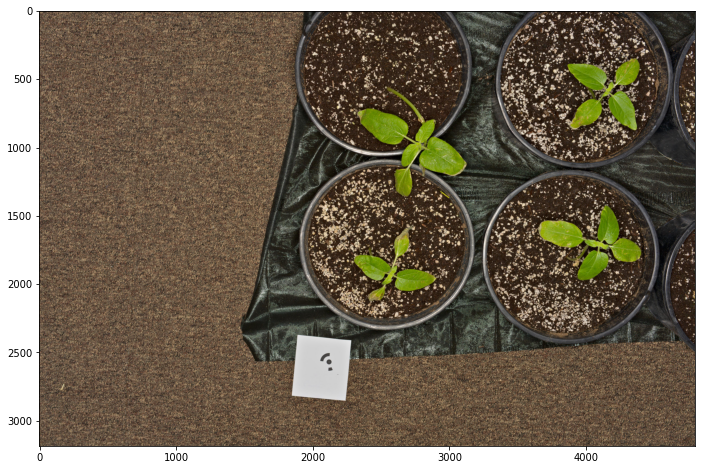

In [27]:

print(f"image_id: {imgs[0].image_id}")
print(f"image_path: {imgs[0].image_path}")
print(f"batch_id: {imgs[0].batch_id}")
plt.figure(figsize=(12,8))
plt.imshow(imgs[0].array) 
plt.show()